In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston = tf.keras.datasets.boston_housing

In [4]:
dir(boston)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'load_data']

In [5]:
boston_data = boston.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
(x_train ,y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing.npz',test_split=0.2,seed = 42)

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [17]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

In [18]:

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-1'),
    tf.keras.layers.BatchNormalization(name='batchnorm-layer-1'),
    tf.keras.layers.Dense(50, name='hidden-layer-2'),
    tf.keras.layers.Dense(1, name='output-layer')
])


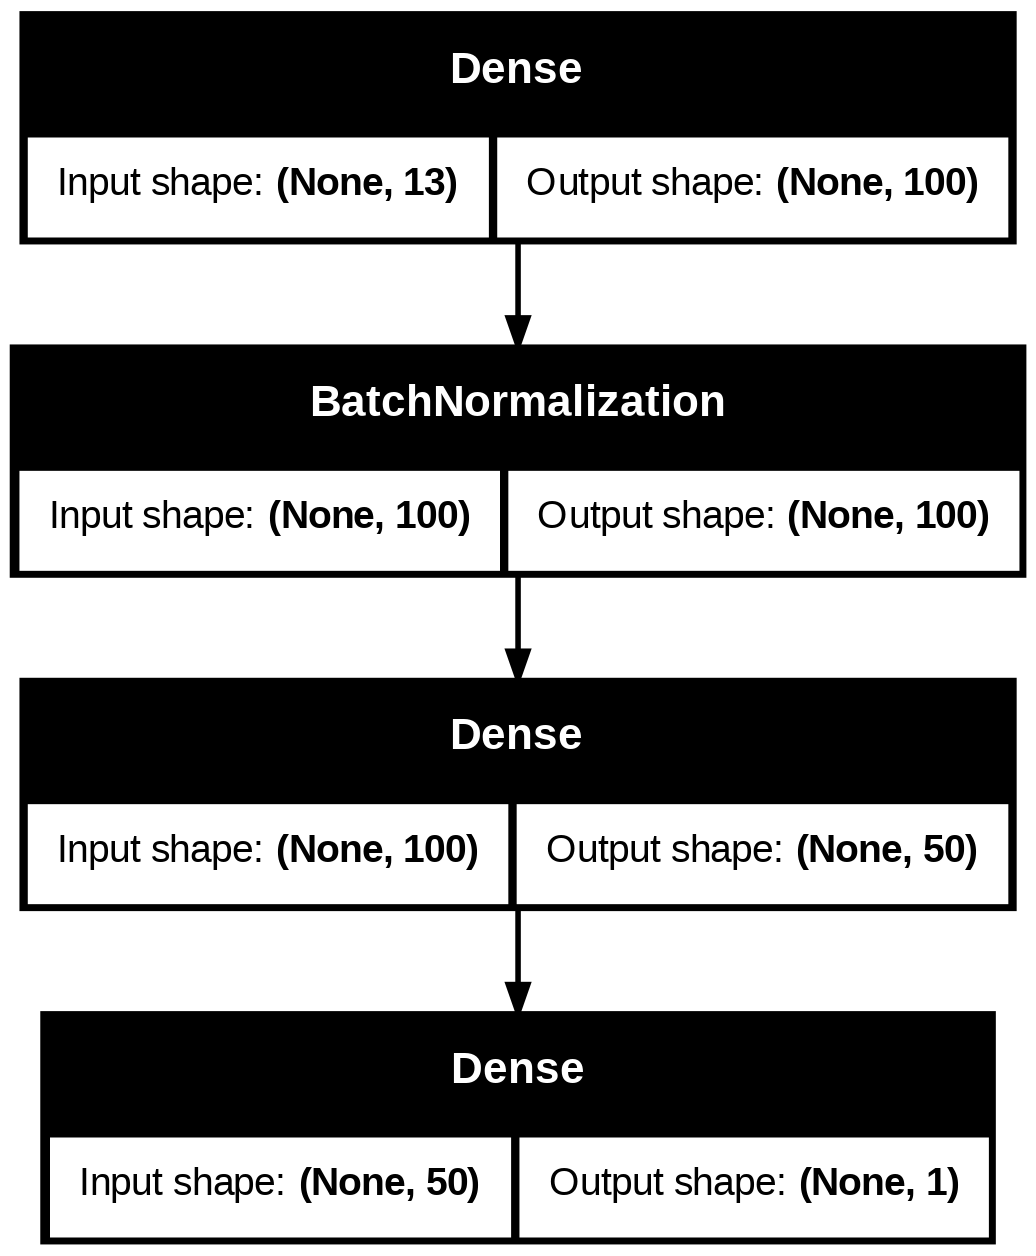

In [49]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [31]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [33]:
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 590.0154 - mae: 22.3273 - val_loss: 1713.6202 - val_mae: 38.2812
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 544.5104 - mae: 21.9554 - val_loss: 797.9647 - val_mae: 26.4616
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 564.1669 - mae: 22.2976 - val_loss: 944.0637 - val_mae: 29.4288
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 512.1910 - mae: 21.2993 - val_loss: 720.1959 - val_mae: 25.5716
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 461.6339 - mae: 20.2235 - val_loss: 637.9709 - val_mae: 24.2213
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 425.9806 - mae: 19.4795 - val_loss: 529.8554 - val_mae: 22.2484
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 305.0342 - mae: 16.3911 - val_loss: 655.0682 - val_mae: 24.8585
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 214.3107 - mae: 13.3737 - val_loss: 452.0445 - val_mae: 20.4579
Epoch 9/20
13/13 ━━

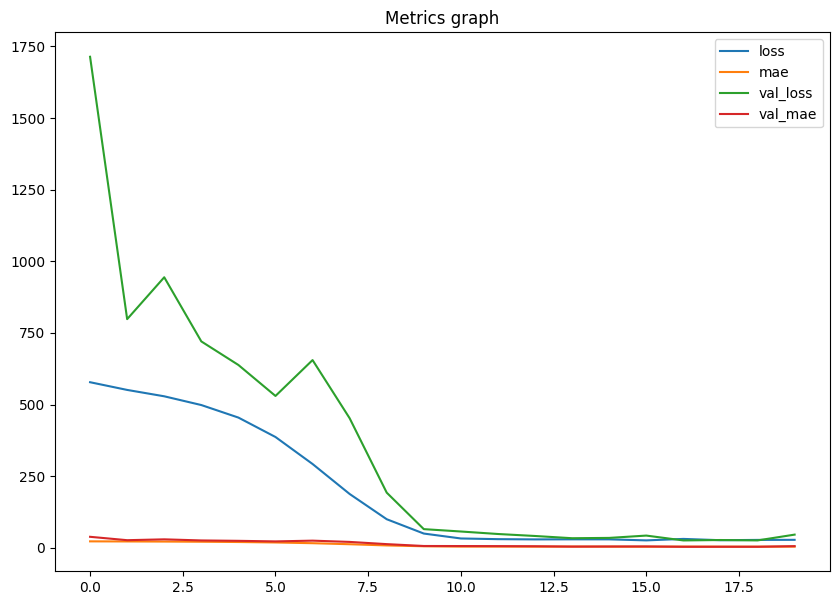

In [34]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [35]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


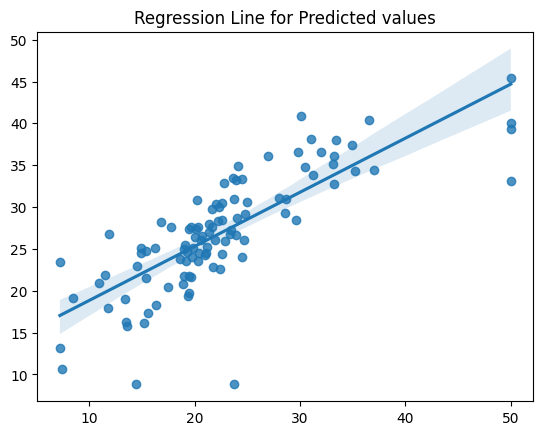

In [36]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [37]:
def regression_metrics_display(y_test, y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")


In [38]:
regression_metrics_display(y_test, y_pred)

MAE is 5.7049758780236335
MSE is 45.89429675931992
R2 score is 0.355435392250382
